In [23]:
# !pip install pandas
# !pip install matplotlib
# !pip install scipy
# !pip install vincent
# !pip install zipcode
# !pip install tqdm
# !pip install gmplot
# !pip install sklearn
!pip install seaborn

In [2]:
import pandas
df = pandas.read_csv("loan.csv")

/home/louis/projects/LC_data/.env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
df.groupby("loan_status").size()

loan_status
Charged Off                                             45248
Current                                                601779
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             207723
In Grace Period                                          6253
Issued                                                   8460
Late (16-30 days)                                        2357
Late (31-120 days)                                      11591
dtype: int64

In [4]:
df = df.iloc[1:100000]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 1 to 99999
Data columns (total 74 columns):
id                             99999 non-null int64
member_id                      99999 non-null int64
loan_amnt                      99999 non-null float64
funded_amnt                    99999 non-null float64
funded_amnt_inv                99999 non-null float64
term                           99999 non-null object
int_rate                       99999 non-null float64
installment                    99999 non-null float64
grade                          99999 non-null object
sub_grade                      99999 non-null object
emp_title                      93648 non-null object
emp_length                     96253 non-null object
home_ownership                 99999 non-null object
annual_inc                     99995 non-null float64
verification_status            99999 non-null object
issue_d                        99999 non-null object
loan_status                    99999 no

In [52]:
to_drop = ["id", "member_id", "url"]
to_drop.extend(["addr_state","zip_code"])
to_drop.append("desc")
to_drop.extend(['funded_amnt', 'funded_amnt_inv'])
to_drop.extend(['total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 
                'total_rec_prncp','tot_coll_amt','total_rev_hi_lim', 'tot_cur_bal'])
to_drop.extend(['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'collections_12_mths_ex_med'])
to_drop.append('emp_title')
to_drop.extend(['last_pymnt_d', 'last_pymnt_amnt'])
to_drop.extend(['recoveries', 'collection_recovery_fee'])
to_drop.append('last_credit_pull_d')

In [7]:
# df["loan_status"].unique()
def default_or_not(x):
    if x == "Charged Off":
        return 1
    if x == "Fully Paid":
        return 0
    else:
        return None
    
df["default"] = df["loan_status"].apply(default_or_not)
df = df[df["default"].notnull()]
to_drop.append("loan_status")

In [8]:
# df["term"].unique()
df["long_term"] = (df["term"] == ' 60 months').apply(int)
to_drop.append("term")

In [9]:
def emp_year(x):
    try:
        x = x.split()[0]
    finally:
        if x == '<':
            return 0
        if x == '10+':
            return 10
        else:
            return int(x)
        
df = df[df["emp_length"].notnull()]
df["emp_year"] = df["emp_length"].apply(emp_year)
to_drop.append("emp_length")

In [10]:
# single value variable
for k in df.keys():
    #print(k, len(df[k].unique()))
    if len(df[k].unique()) == 1:
        to_drop.append(k)

In [11]:
df = df.join(pandas.get_dummies(df['grade']))
df = df.join(pandas.get_dummies(df['purpose']))
df = df.join(pandas.get_dummies(df['verification_status']))
df = df.join(pandas.get_dummies(df['initial_list_status']))

to_drop.append("grade")
to_drop.append("sub_grade")
to_drop.append("purpose")
to_drop.append("title")
to_drop.append('verification_status')
to_drop.append('initial_list_status')

In [12]:
df.groupby('home_ownership').count()
df['own_home'] = (df['home_ownership'] == "OWN").apply(int)
to_drop.append('home_ownership')

In [13]:
# Delete pymnt_plan
df = df[df['pymnt_plan'] == 'n']
to_drop.append('pymnt_plan')

In [14]:
df['issue_d'].unique()
df['year'] = df['issue_d'].apply(lambda x: int(x.split('-')[1]))
to_drop.append('issue_d')

In [53]:
df['earliest_cr_line'].unique()
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))
to_drop.append('earliest_cr_line')

KeyError: 'earliest_cr_line'

In [69]:
print(to_drop)
df = df.drop(columns = to_drop, errors = 'ignore')
df = df.dropna()

['id', 'member_id', 'url', 'addr_state', 'zip_code', 'desc', 'funded_amnt', 'funded_amnt_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'tot_coll_amt', 'total_rev_hi_lim', 'tot_cur_bal', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'collections_12_mths_ex_med', 'emp_title', 'last_pymnt_d', 'last_pymnt_amnt', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d']


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62222 entries, 1 to 99998
Data columns (total 45 columns):
loan_amnt             62222 non-null float64
int_rate              62222 non-null float64
installment           62222 non-null float64
annual_inc            62222 non-null float64
dti                   62222 non-null float64
delinq_2yrs           62222 non-null float64
inq_last_6mths        62222 non-null float64
open_acc              62222 non-null float64
pub_rec               62222 non-null float64
revol_bal             62222 non-null float64
revol_util            62222 non-null float64
total_acc             62222 non-null float64
acc_now_delinq        62222 non-null float64
default               62222 non-null float64
long_term             62222 non-null int64
emp_year              62222 non-null int64
A                     62222 non-null uint8
B                     62222 non-null uint8
C                     62222 non-null uint8
D                     62222 non-null uint8
E  

In [71]:
df.max()

loan_amnt               35000.00
int_rate                   26.06
installment              1408.13
annual_inc            6000000.00
dti                        34.99
delinq_2yrs                18.00
inq_last_6mths              8.00
open_acc                   49.00
pub_rec                     9.00
revol_bal             1746716.00
revol_util                128.10
total_acc                  90.00
acc_now_delinq              5.00
default                     1.00
long_term                   1.00
emp_year                   10.00
A                           1.00
B                           1.00
C                           1.00
D                           1.00
E                           1.00
F                           1.00
G                           1.00
car                         1.00
credit_card                 1.00
debt_consolidation          1.00
educational                 1.00
home_improvement            1.00
house                       1.00
major_purchase              1.00
medical   

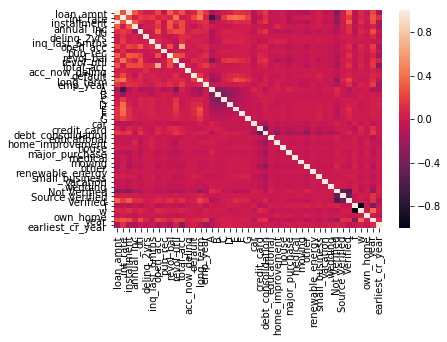

In [56]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X = df.drop(columns=['default', 'installment'])
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
weight = y_train*4 + 1 

logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
logreg.fit(X_train, y_train, sample_weight=weight)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


In [96]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[9827 5772]
 [1013 2055]]


In [131]:
y_p = logreg.predict_proba(X_test)[:,1] > 0.3

In [132]:
matrix = confusion_matrix(y_test, y_p)
print(matrix)

[[ 3413 12186]
 [  180  2888]]


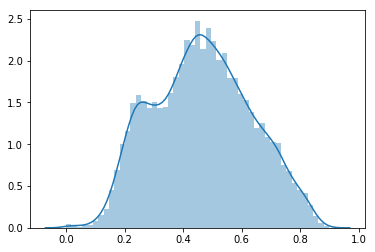

In [118]:
sns.distplot(logreg.predict_proba(X_test)[:,1])

In [ ]:
df.head(5)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df["loan_amnt"].plot.density()

In [ ]:
df.groupby("grade").size().plot.bar()

In [ ]:
df.groupby("grade")["int_rate"].mean()

In [ ]:
df.groupby("sub_grade")["int_rate"].mean().plot.bar()

In [ ]:
df.groupby("emp_length")["id"].count().plot.bar()

In [ ]:
def get_loc(zip_code):
    import zipcode
    short_code = zip_code.replace('x', '')
    l = zipcode.islike(short_code)
    if l:
        location = l[0]
        return (location.lon, location.lat)
    else:
        return (None, None)

from tqdm import tqdm
tqdm.pandas(desc="Pandas progress")
df["lon"] = df["zip_code"].progress_apply(lambda x: get_loc(x)[0])
df["lat"] = df["zip_code"].progress_apply(lambda x: get_loc(x)[1])

import gmplot
df2 = df[df["lon"].notnull()]
gmap = gmplot.GoogleMapPlotter.from_geocode("The United State",4)
gmap.heatmap(df2['lat'], df2['lon'])
gmap.draw('heat_map.html')

In [ ]:
df.groupby("loan_status").size().plot.bar()

In [ ]:
df["loan_status"].unique()

https://www.dataquest.io/blog/machine-learning-preparing-data/

In [ ]:
df["annual_inc"].plot.density(logx = True)

In [ ]:
df["annual_inc"].describe()

In [ ]:
df.iloc[3]

In [ ]:
df.groupby("purpose").size().plot.bar()

In [ ]:
df['dti'].plot.density()

In [ ]:
df["verification_status"].unique()

In [ ]:
df[df["annual_inc"] > 1000000]

In [ ]:
df.groupby("loan_status")["int_rate"].mean().plot.bar()

In [ ]:
df.groupby(("term","loan_status")).size().plot.bar()

In [ ]:
df["emp_title"].unique()